In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ecommerce.csv")

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11-09-2015,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,07-02-2015,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12-05-2015,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,05-09-2015,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,07-09-2015,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [4]:
# Convert 'Sales' column to numeric (example conversion, adapt for other columns if needed)
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',', '')  # Remove $ and commas
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  # Convert to numeric, handle non-convertible values

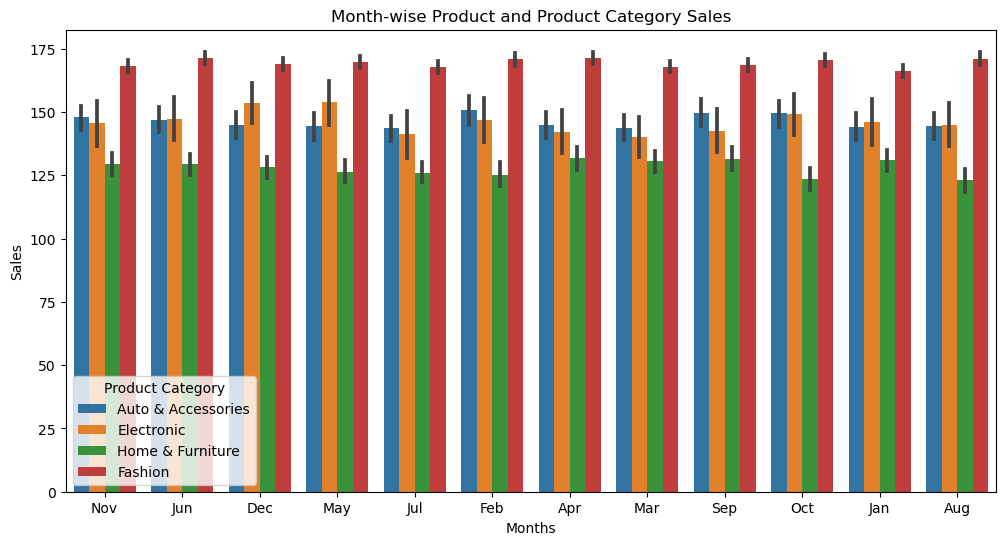

In [5]:
# Plotting a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Months', y='Sales', hue='Product Category', data=df)
plt.title('Month-wise Product and Product Category Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [6]:
# Assuming 'Country' and 'Sales' are numeric
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
fig = px.choropleth(country_sales, locations='Country', locationmode='country names',
                     color='Sales', hover_name='Country', title='Sales by Country')
fig.show()

In [7]:
# Assuming 'Product Category' and 'Sales' are numeric
sales_by_category = df.groupby('Product Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_category, x='Product Category', y='Sales', color='Sales', title='Total Sales by Product Category')
fig.update_xaxes(tickangle=45)
fig.show()


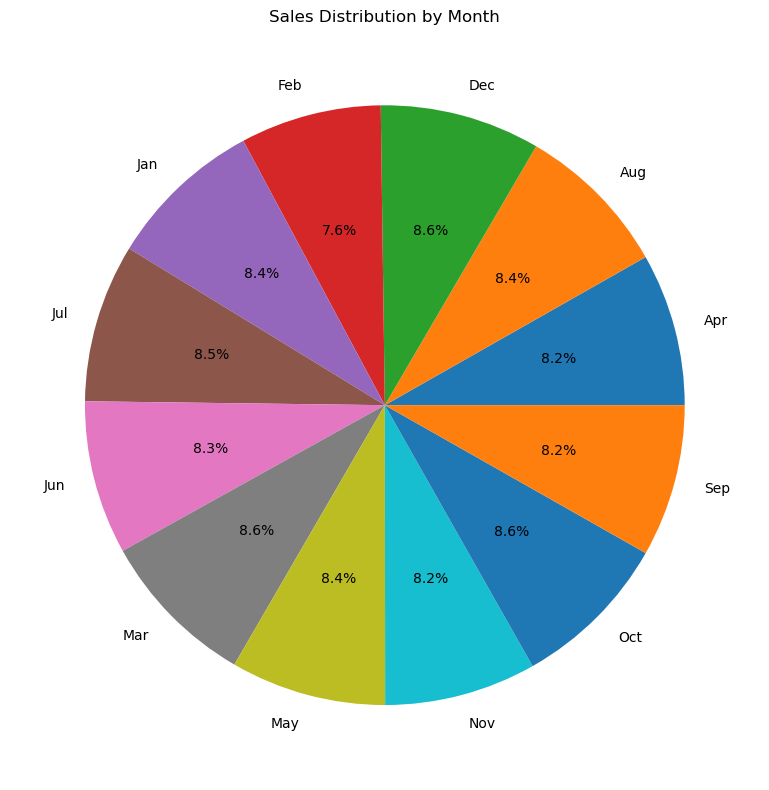

In [8]:
# Assuming 'Months' and 'Sales' are numeric
sales_by_month = df.groupby('Months')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_month, labels=sales_by_month.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Month')
plt.tight_layout()
plt.show()

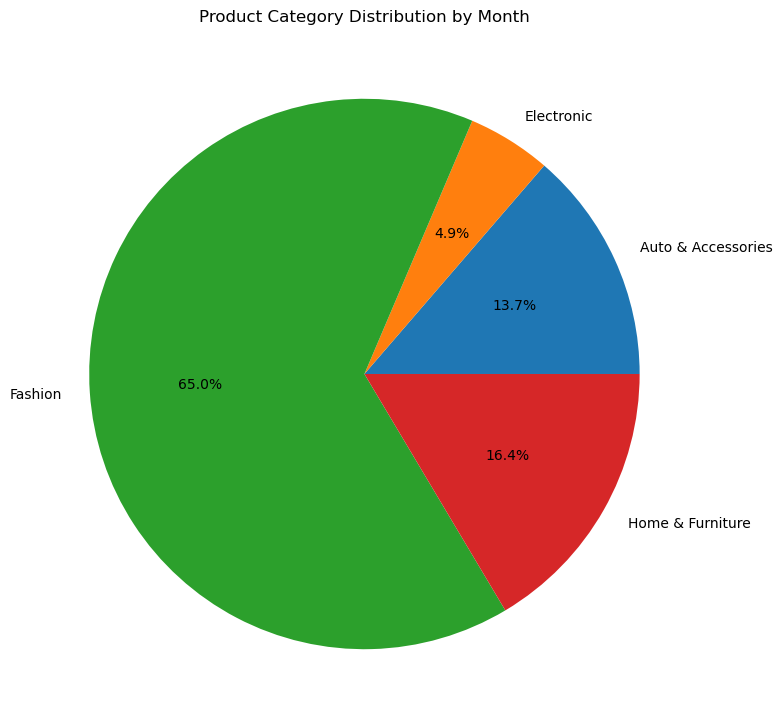

In [9]:
# Assuming 'Product Category' and 'Sales' are numeric
sales_by_month = df.groupby('Product Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_month, labels=sales_by_month.index, autopct='%1.1f%%')
plt.title('Product Category Distribution by Month')
plt.tight_layout()
plt.show()